In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
image_size = (128, 128)  
batch_size = 32         
data_dir = './imgs' 

In [3]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [4]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 3502 images belonging to 26 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 873 images belonging to 26 classes.


In [6]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(image_size[0], image_size[1], 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

C:\Users\juanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20


C:\Users\juanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.0486 - loss: 6.1809 - val_accuracy: 0.0833 - val_loss: 3.2585
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.0625 - loss: 3.2017 - val_accuracy: 0.1111 - val_loss: 3.0449
Epoch 3/20


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.0701 - loss: 3.1639 - val_accuracy: 0.0486 - val_loss: 3.1195
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.0000e+00 - loss: 3.3734 - val_accuracy: 0.0000e+00 - val_loss: 2.6938
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.1052 - loss: 2.7354 - val_accuracy: 0.1331 - val_loss: 2.4128
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.1250 - loss: 2.4672 - val_accuracy: 0.2222 - val_loss: 2.3420
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.1418 - loss: 2.4795 - val_accuracy: 0.2419 - val_loss: 2.1898
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.2812 - loss: 1.9638 - val_accuracy: 0.1111 - val_loss: 2.3580
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.2010 - loss: 2.1759 - val_accuracy: 0.2280 - val_loss: 2.2353
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.3125 - loss: 2.0791 

In [9]:
history

In [10]:
model.compute_loss

<bound method Trainer.compute_loss of <Sequential name=sequential, built=True>>

In [11]:
model.save('modelo_redes_3.keras')


Text(0.5, 0, 'Steps')

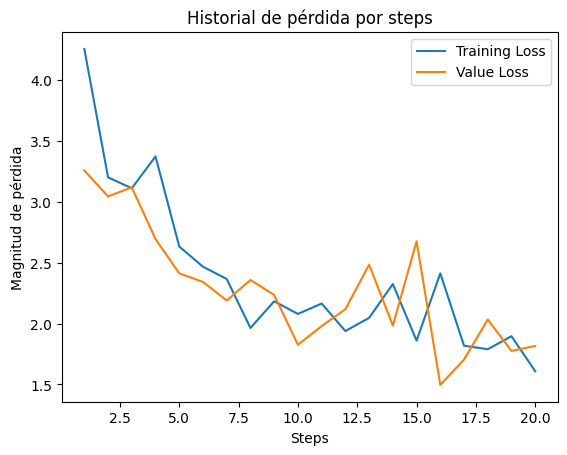

In [12]:
loss_values = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss, label='Value Loss')
plt.legend()
plt.title('Historial de pérdida por steps')
plt.ylabel('Magnitud de pérdida')
plt.xlabel('Steps')

Text(0.5, 0, 'Steps')

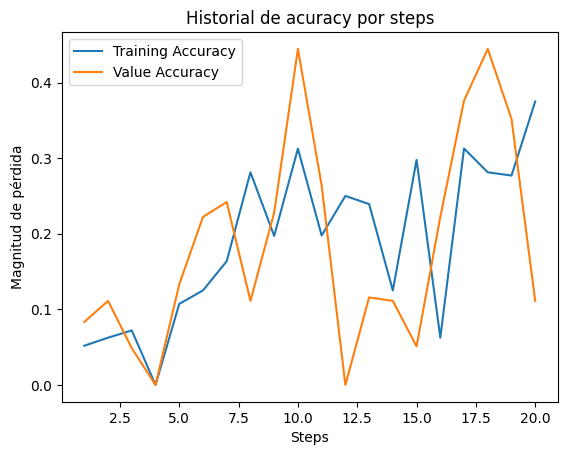

In [13]:
loss_values = history.history["accuracy"]
val_loss = history.history["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Accuracy')
plt.plot(epochs, val_loss, label='Value Accuracy')
plt.legend()
plt.title('Historial de acuracy por steps')
plt.ylabel('Magnitud de pérdida')
plt.xlabel('Steps')